In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from python.data import Dataloader
from python.models import RandomExampleModel
import python.metrics

In [3]:
# Loading the data
data_loader = Dataloader("./data/dataset_4/") # Specify path to the dataset you want to load
X, Y = data_loader.load()


In [4]:
X_re = X
Y_re = Y

In [85]:
X_re[:3]

array([[0.45360563, 0.25691407, 0.71509031, 0.90380217],
       [0.83007226, 0.03330589, 0.51154491, 0.33237916],
       [0.89127263, 0.22972051, 0.20723437, 0.38867979]])

In [28]:
X_re.min(axis=0), Y_re.min(axis=0).all()
mins = min(min_int_X, min_int_Y).all()
min_int_Y = Y_re.min(axis=0)

(array([0.34810015, 0.03330589, 0.06496445, 0.15995849]),
 <function ndarray.all>)

In [37]:
min_int_X = X_re.min(axis=0)


AttributeError: 'numpy.ndarray' object has no attribute 'list'

In [3]:
from gurobipy import *
import math

K = 2
m = Model("IntuitionV0")
L = 5
N_CRITERIA = 5
criteria = [[(m.addVar(name=f"u_{i}_{l}_{k}")) for l in range(L+1)] for i in range(N_CRITERIA) for k in range(K)]
print(criteria)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-18
[[<gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>], [<gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>], [<gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>], [<gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model Update*>, <gurobi.Var *Awaiting Model

In [51]:

min_int_X = X_re.min(axis=0)
min_int_Y = Y_re.min(axis=0)
mins = np.min(np.vstack((min_int_X, min_int_Y)), axis = 0)

max_int_X = X_re.max(axis=0)
max_int_Y = Y_re.max(axis=0)
maxs = np.max(np.vstack((max_int_X, max_int_Y)), axis = 0)

def segment(i, j, X):
    x = X[i][j]
    #floor permet de faire l'arrondi 
    #donne un chiffre entre 0 et L (ici 5) qui donne l'appartenance à l'un des 6 segment possible 
    #X[i] correspond à une occurence d'un produit traité 
    #j correspond à l'indice de feature 
    #correspond au commentaire de la question 2
    return math.floor(L * (x - mins[j]) / (maxs[j] - mins[j]))


P = []
for m in range(2000) :
    P.append(segment(m,2, X_re))

print(np.max(P))

5


In [77]:
[1, 2, 3, 4] + [0, 0, 0, 0]

[1, 2, 3, 4, 0, 0, 0, 0]

In [10]:
from gurobipy import *
import math
import random
# Instanciation du modèle
m = Model("IntuitionV0")

PRECISION = 0.01
#Nombre de features
N_CRITERIA = len(X_re[0])

#Nombre de segment/breakpoints dans toutes les fonctions de score, possible de l'adapter pour chaque feature 
L = 5
#Nombre d'occurence dans le dataset/produits traités 
N_COMPARAISON = len(X_re)


#Nombre de clusters 
K=2

#Majorant contrainte 
M=4

#à définir clairement : 




criteria = [[[(m.addVar(name=f"u_{j}_{l}_{k}")) for k in range(K)] for l in range(L+1)]for j in range(N_CRITERIA) ]

sigma_Xplus = [[(m.addVar(name=f"sigma+_{i}_{k}")) for k in range(K) ] for i in range(N_COMPARAISON)]
sigma_Xminus = [[(m.addVar(name=f"sigma-_{i}_{k}")) for k in range(K)] for i in range(N_COMPARAISON)]
sigma_Yplus = [[(m.addVar(name=f"sigma+_{i}_{k}")) for k in range(K)] for i in range(N_COMPARAISON)]
sigma_Yminus = [[(m.addVar(name=f"sigma-_{i}_{k}")) for k in range(K)] for i in range(N_COMPARAISON)]



z_binary = [[m.addVar(name=f"z_{i}_{k}") for k in range(K) ] for i in range(N_COMPARAISON)]

#hyperparamètre pour le modèle
epsilon = PRECISION
# maj du modèle
m.update()




#récupère les minimum et maximum de chaque feature 
#mins = (min(X_re.min(axis=0), Y_re.min(axis=0))).any()
#maxs = (max(X_re.max(axis=0), Y_re.max(axis=0))).any()

min_int_X = X_re.min(axis=0)
min_int_Y = Y_re.min(axis=0)
mins = np.min(np.vstack((min_int_X, min_int_Y)), axis = 0)

max_int_X = X_re.max(axis=0)
max_int_Y = Y_re.max(axis=0)
maxs = np.max(np.vstack((max_int_X, max_int_Y)), axis = 0)

def segment(i, j, X):
    x = X[i][j]
    #floor permet de faire l'arrondi 
    #donne un chiffre entre 0 et L (ici 5) qui donne l'appartenance à l'un des 6 segment possible 
    #X[i] correspond à une occurence d'un produit traité 
    #j correspond à l'indice de feature 
    #correspond au commentaire de la question 2
    return math.floor(L * (x - mins[j]) / (maxs[j] - mins[j]))

#cette fonction précédente permettra a priori de trouver le l de la fonction suivante

#l correspond au tronçon sur lequel est la valeur 
#retourne l'abscisse de gauche ? du tronçon l 
#appelé xik dans question 3
def x_seg(j, seg):
    return mins[j] + seg * (maxs[j] - mins[j]) / L

#calcule la valeur si(xij)
#cad le score partiel pour un feature donné 
# ?? on obtient le score à partir d'une forme ressemblant au développement limité autour de la valeur de la feature sur le tronçon

def u(i,j,k,X,eval : bool = False):
    get_val = (lambda v: v.X) if eval else (lambda v: v)
    x = X[i][j]
    #segm pour le numéro de tronçon
    
    segm = segment(i, j, X)
    
    x_segm = x_seg(j, segm)
    
    x_segm_1 = x_seg(j, segm +1)
    


    if x == maxs[j]:
        return get_val(criteria[j][L][k]) 
    
    S=0
    S = get_val(criteria[j][segm][k])
    slope = (x - x_segm)/(x_segm_1 - x_segm)
    width = get_val(criteria[j][segm+1][k]) - get_val(criteria[j][segm][k])
    S =+ slope*width

    return S


#définissons la somme des fonctions de score pour un produit (de rang i)
def s(i, X, k, eval : bool = False):
    if not eval : 
        return quicksum(u(i,j,k,X,False) for j in range(N_CRITERIA))
    else : 
        return sum(u(i,j,k,X,False) for j in range(N_CRITERIA))



# Ajout des contraintes

#Documentation Gurobi propre



# contraintes de préférence des universités
for k in range(K): 

    for i in range(N_COMPARAISON) :
        #print(r"boucle contrainte",i)
        

        m.addConstr((s(i, X_re, k, False) - sigma_Xplus[i][k] + sigma_Xminus[i][k]) - (s(i, Y_re, k, False) - sigma_Yplus[i][k] + sigma_Yminus[i][k] + epsilon)<= (M*z_binary[i][k]+ epsilon))
        m.addConstr(M*(1-z_binary[i][k])<= (s(i, X_re, k, False) - sigma_Xplus[i][k] + sigma_Xminus[i][k]) - (s(i, Y_re, k, False) - sigma_Yplus[i][k] + sigma_Yminus[i][k] + epsilon))





        
# Constraint for sigma_Xminus
for k in range(K):
    for i in range(N_COMPARAISON):
        m.addConstr(sigma_Xminus[i][k] >= epsilon)

# Constraint for sigma_Xplus
for k in range(K):
    for i in range(N_COMPARAISON):
        m.addConstr(sigma_Xplus[i][k] >= epsilon)

# Constraint for sigma_Yminus
for k in range(K):
    for i in range(N_COMPARAISON):
        m.addConstr(sigma_Yminus[i][k] >= epsilon)

# Constraint for sigma_Yplus
for k in range(K):
    for i in range(N_COMPARAISON):
        m.addConstr(sigma_Yplus[i][k] >= epsilon)

#for sig in sigma_Xminus + sigma_Xplus + sigma_Yminus + sigma_Yplus:
#    m.addConstr(sig >= 0)

# contrainte 3
for k in range(K) :
    for j in range(N_CRITERIA):
        for l in range(L):
            m.addConstr(criteria[j][l+1][k] - criteria[j][l][k] >= epsilon)


for k in range(K): 
    m.addConstr(quicksum(criteria[j][L][k] for j in range(N_CRITERIA)) == 1)
#Est ce que l'on veut la somme des abcisses des points de rupture == 1 ou la somme des scores associés à chaque points de rupture ==1
#for k in range(K):
#    for j in range(N_CRITERIA):
#        TEST = [criteria[j][l][k] for l in range(L+1)]
#        print(TEST)
#        m.addConstr(quicksum(TEST) == 1)

# contrainte 4
#for k in range(K):
#        TEST = np.array([criteria[j][l][k].X for l in range(L+1)])  
#        #print(TEST)
#        TEST_2 =np.vstack([np.array([ 2, 2, 2, 2, 2, 2]) ,TEST])
#        print(TEST_2)
#        print(r"mins", mins)
#        print(r"mins_ada", mins_ada)
#        m.addConstr(sum(u(1, j, k, TEST_2, False) for j in range(L+1)) == 1)


#for k in range(K):
#    for j in range(N_CRITERIA):
#        Somme = sum(criteria[j][l][k] for l in range(L+1))
#        #print(r"SOMME j, k", Somme, j, k, )
#        m.addConstr(Somme == 1 )

#Permet d'avoir des résultats plus cohérents sauf pour les bornes supérieures
#for k in range(K):
#    for i in range(N_COMPARAISON):
#        m.addConstr(s(i, X, k, False)  == 1 )

#for k in range(K):
#    for i in range(N_COMPARAISON):
#        m.addConstr(1 - epsilon <= s(i, X, k, False))

# contrainte 5
for k in range(K):
    for j in range(N_CRITERIA):
        #ajustement arbitraire avec 2222 car u() traite toujours des matrices
        mins_ada = np.vstack([np.array([ 2, 2, 2, 2]), mins])
       
        #print(u(1, j,k, mins_ada, False))
        #mins correspond aux plus petites valeurs possibles pour chaque critère
        m.addConstr(u(1, j,k, mins_ada, False) == 0)


        
# Flatten the lists of lists into a single list
sigma_Xplus_flat = [var for sublist in sigma_Xplus for var in sublist]
sigma_Xminus_flat = [var for sublist in sigma_Xminus for var in sublist]
sigma_Yminus_flat = [var for sublist in sigma_Yminus for var in sublist]
sigma_Yplus_flat = [var for sublist in sigma_Yplus for var in sublist]

# Objective function
m.setObjective(sum(sigma_Xplus_flat) + sum(sigma_Xminus_flat) + sum(sigma_Yminus_flat) + sum(sigma_Yplus_flat), GRB.MINIMIZE)



# Fonction Objectif
#m.setObjective(sum(sigma_Xplus) + sum(sigma_Xminus) + sum(sigma_Yminus) + sum(sigma_Yplus), GRB.MINIMIZE)         
# Paramétrage (mode mute)
#m.Params.Presolve = 0

valeur_initiales = {}
#Création de valeurs initiales 
for j in range(N_CRITERIA):
    for l in range(L+1):
        for k in range(K):
            valeur_initiales[criteria[j][l][k]] = random.random()

m.setParam('u_{?}_{?}_{?}', valeur_initiales)

# Résolution du PL
m.optimize()
#print("La solution optimale est (v0, v1) = {} avec pour objectif z = {}".format((v0.x, v1.x), m.objVal))
print(criteria)

GurobiError: Unknown parameter 'u_{?}_{?}_{?}'

In [36]:
from gurobipy import *
import math
# Instanciation du modèle
m = Model("IntuitionV0")

PRECISION = 0.001
#Nombre de features
N_CRITERIA = len(X_re[0])
print(N_CRITERIA)
#Nombre de segment/breakpoints dans toutes les fonctions de score, possible de l'adapter pour chaque feature 
L = 5
#Nombre d'occurence dans le dataset/produits traités 
N_COMPARAISON = len(X_re)
print(N_COMPARAISON)

#Nombre de clusters 
K=2

#Majorant contrainte 
M=4

#à définir clairement : 


criteria = [[[(m.addVar(name=f"u_{i}_{l}_{k}")) for i in range(N_CRITERIA)] for l in range(L+1)] for k in range(K)]

sigma_Xplus = [[(m.addVar(name=f"sigma+_{i}_{k}")) for i in range(N_COMPARAISON)] for k in range(K)]
sigma_Xminus = [[(m.addVar(name=f"sigma-_{i}_{k}")) for i in range(N_COMPARAISON)] for k in range(K)]
sigma_Yplus = [[(m.addVar(name=f"sigma+_{i}_{k}")) for i in range(N_COMPARAISON)] for k in range(K)]
sigma_Yminus = [[(m.addVar(name=f"sigma-_{i}_{k}")) for i in range(N_COMPARAISON)] for k in range(K)]


#sigma_Xplus = [(m.addVar(name=f"sigma+_{i}_{k}") for i in range(N_COMPARAISON))for k in range(K)]
#sigma_Xminus = [(m.addVar(name=f"sigma-_{i}_{k}") for i in range(N_COMPARAISON))for k in range(K)]

#sigma_Yplus = [(m.addVar(name=f"sigma+_{i}_{k}") for i in range(N_COMPARAISON))for k in range(K)]
#sigma_Yminus = [(m.addVar(name=f"sigma-_{i}_{k}") for i in range(N_COMPARAISON))for k in range(K)]

z_binary = [[m.addVar(name=f"z_{i}_{k}") for i in range(N_COMPARAISON)] for k in range(K)]

#hyperparamètre pour le modèle
epsilon = PRECISION
# maj du modèle
m.update()

#récupère les minimum et maximum de chaque feature 
#mins = (min(X_re.min(axis=0), Y_re.min(axis=0))).any()
#maxs = (max(X_re.max(axis=0), Y_re.max(axis=0))).any()

min_int_X = X_re.min(axis=0)
min_int_Y = Y_re.min(axis=0)
mins = np.min(np.vstack((min_int_X, min_int_Y)), axis = 0)

max_int_X = X_re.max(axis=0)
max_int_Y = Y_re.max(axis=0)
maxs = np.max(np.vstack((max_int_X, max_int_Y)), axis = 0)

def li(i, X):
    x = X[i]
    #floor permet de faire l'arrondi 
    #donne un chiffre entre 0 et L (ici 4) qui donne l'appartenance à l'un des 5 segment possible 
    #X correspond à une occurence d'un produit traité 
    #i correspond à l'indice de feature 
    #correspond au commentaire de la question 2
    return math.floor(L * (x - mins[i]) / (maxs[i] - mins[i]))

#cette fonction précédente permettra a priori de trouver le l de la fonction suivante

#l correspond au tronçon sur lequel est la valeur 
#retourne l'abscisse de gauche ? du tronçon l 
#appeler xik dans question 3
def xl(i, l):
    return mins[i] + l * (maxs[i] - mins[i]) / L

#calcule la valeur si(xij)
#cad le score partiel pour un feature donné 
# ?? on obtient le score à partir d'une forme ressemblant au développement limité autour de la valeur de la feature sur le tronçon

def u_i(i, k,  X, evalueate: bool=False):
    get_val = (lambda v: v.X) if evalueate else (lambda v: v)
    x = X[i]
    l = li(i,X)
    
    if x == maxs[i]:
        return get_val(criteria[i][-1][k]) 

    x_l = xl(i, l)
    width = x - x_l

    print(r"i dans u",i)
    print(r"l dans u",l)
    print(r"k dans u",k)

    print(get_val(criteria[i][l][k]))
    print(get_val(criteria[i][l + 1][k]))
    

    slope = get_val(criteria[i][l + 1][k]) - get_val(criteria[i][l][k]) * L / (maxs[i] - mins[i])
    return get_val(criteria[i][l][k]) + slope * width

#fait la somme pour calculer le score de chaque produit étudié 
#quicksum : fonction propre à gurobi pour faire de l'optimisation sous contrainte de somme 
def s(X,k, evalueate: bool=False):
    if not evalueate:
        return quicksum(u_i(i, k, X, evalueate=False) for i in range(N_CRITERIA))
    else:
        return sum(u_i(i, k, X, evalueate=True) for i in range(N_CRITERIA))


# Ajout des contraintes

#Documentation Gurobi propre

# contraintes de préférence des universités
for k in range(K): 

    for i in range(N_COMPARAISON) :
        print(r"boucle contrainte",i)
        A=s(X_re[i], k) 
        B = sigma_Xplus[i][k] + sigma_Xminus[i][k]
        C=s(Y_re[i], k) - sigma_Yplus[i][k] + sigma_Yminus[i][k] + epsilon
        
        
        m.addConstr(M*(1-z_binary[i][k])<= (s(X_re[i], k) - sigma_Xplus[i][k] + sigma_Xminus[i][k]) - (s(Y_re[i], k) - sigma_Yplus[i][k] + sigma_Yminus[i][k] + epsilon))
        m.addConstr((s(X_re[i], k) - sigma_Xplus[i][k] + sigma_Xminus[i][k]) - (s(Y_re[i], k) - sigma_Yplus[i][k] + sigma_Yminus[i][k] + epsilon)<= (M*z_binary[i][k]+ epsilon))
        #m.addConstr(s(X_re[i]) - sigma_Xplus[i] + sigma_Xminus[i] >=  s(Y_re[i]) - sigma_Yplus[i] + sigma_Yminus[i] + epsilon)


for sig in sigma_Xminus + sigma_Xplus + sigma_Yminus + sigma_Yplus:
    m.addConstr(sig >= 0)

# contrainte 3
for k in range(K) :
    for l in range(L-1):
        for i in range(N_CRITERIA):
            m.addConstr(criteria[i][l+1][k] - criteria[i][l][k] >= epsilon)

# contrainte 4
for k in range(K):
    for i in range(N_CRITERIA):
        m.addConstr(u_i(i,k, mins) == 0)

# contrainte 5
for k in range(K):
    m.addConstr(quicksum(u_i(i, k, maxs) for i in range(N_CRITERIA)) == 1)


# Fonction Objectif
m.setObjective(sum(sigma_Xplus) + sum(sigma_Xminus) + sum(sigma_Yminus) + sum(sigma_Yplus), GRB.MINIMIZE)         
# Paramétrage (mode mute)
m.Params.Presolve = 0
# Résolution du PL
m.optimize()
#print("La solution optimale est (v0, v1) = {} avec pour objectif z = {}".format((v0.x, v1.x), m.objVal))
print(criteria)

4
2000
boucle contrainte 0
i dans u 0
l dans u 2
k dans u 0
<gurobi.Var u_0_2_0>
<gurobi.Var u_0_3_0>
i dans u 1
l dans u 1
k dans u 0
<gurobi.Var u_0_1_1>
<gurobi.Var u_0_2_1>
i dans u 2
l dans u 3
k dans u 0


IndexError: list index out of range

u_0_0 0.0


TypeError: float() argument must be a string or a real number, not 'gurobipy.LinExpr'

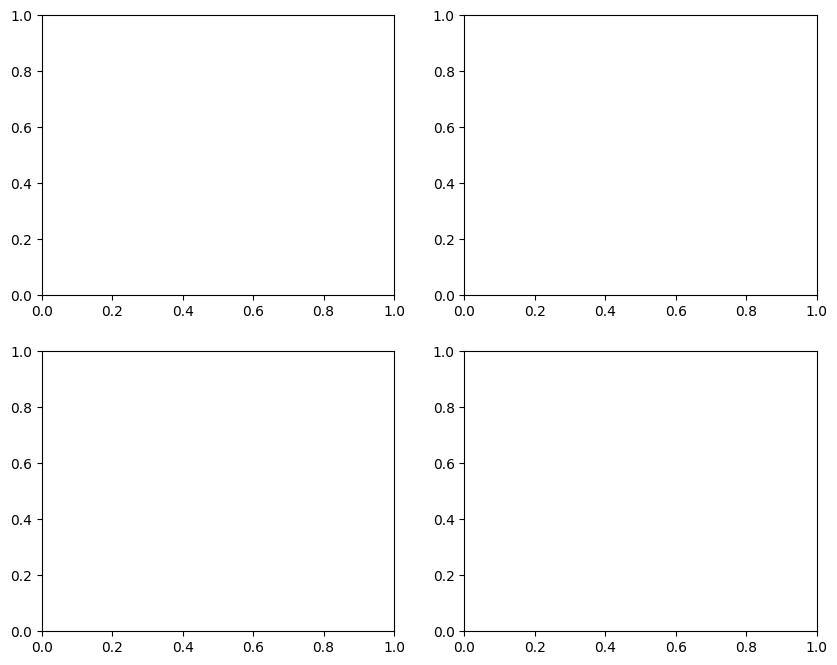

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, crits in enumerate(criteria):
    for j, crit in enumerate(crits):
        print(crit.varName, crit.X)
        axs[i].bar(crits, crit, label=f'Subplot {i+1}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [13]:
# Let's train an example model
model = RandomExampleModel() # Instantiation of the model with hyperparameters, if needed
model.fit(X, Y) # Training of the model, using preference data

In [45]:
model = IntuitionV0()
model.fit(X, Y)

NameError: name 'IntuitionV0' is not defined

In [11]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[-0.06326043 -0.18471619]
 [-0.20129649 -0.33004454]
 [ 0.00500771 -0.09058298]
 [ 0.07658458  0.12828252]
 [-0.06293998 -0.07432317]]


In [15]:
print(model.predict_utility(X)[:5])
print(model.predict_utility(Y)[:5])


[[0.58784814 0.5184542 ]
 [0.53863346 0.476744  ]
 [0.45795201 0.43516468]
 [0.51788081 0.47398788]
 [0.33944544 0.36321772]]
[[0.65110857 0.7031704 ]
 [0.73992996 0.80678855]
 [0.4529443  0.52574767]
 [0.44129623 0.34570536]
 [0.40238542 0.4375409 ]]


In [12]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:5]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]]


In [16]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X, Y)[:5] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", np.sum(pairs_explained) / 5) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 0.8


In [8]:
# Or we call directly the right metric:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X), model.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.5845
Percentage of explained preferences for all samples: 0.5845


In [9]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X, Y)[:5]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[0 0 0 1 0]


In [10]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
# We can see how it compares to our model's predictions:
print(Z[:5])

[0 0 0 1 0]


In [11]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X, Y, Z))

Cluster intersection for 5 first samples: 1.0
Cluster intersection for all samples: 0.6577508754377188
Cluster intersection for all samples: 0.6577508754377188


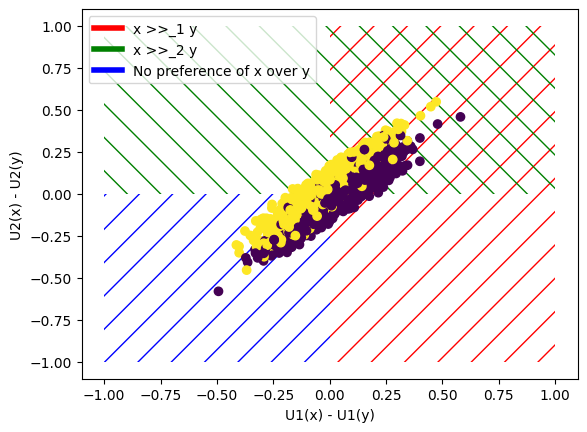

In [12]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [13]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

parameters = {"n_pieces": 5,} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)

# Uncomment once your model is working
# print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
# print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

TypeError: TwoClustersMIP.__init__() missing 1 required positional argument: 'n_clusters'

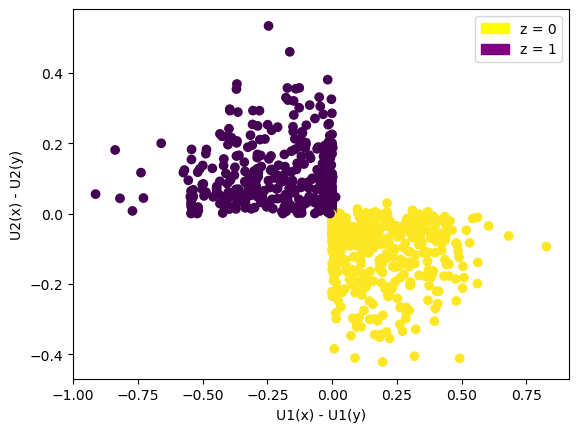

In [14]:
# As an example here are the results obtained with:
""" # Uncomment the code to check your results
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()
"""
# Here is how it should look like
from IPython.display import Image
Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.